# <span style="color:blue"> Projeto 01 - Concessão de cartões de crédito </span>
<span style="color:blue"> Este notebook é semelhante ao visto em vídeo, mas contém células azuis como esta, que trazem instruções para a sua atividade.</span>

<span style="color:blue">Após realizar as tarefas indicadas, você vai fazer o upload do seu arquivo no GitHub e enviar o link para a EBAC, ou alternativamente, fazer o upload do arquivo na plataforma da EBAC. Recomendamos o github, pois assim você já vai montando o seu portfólio.</span>

## Etapa 1 CRISP - DM: Entendimento do negócio

Como primeira etapa do CRISP-DM, vamos entender do que se trata o negócio, e quais os objetivos. 

Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).  
  
Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).

Atividades do CRISP-DM:

- Objetivos do negócio
Note que o objetivo aqui é que o modelo sirva o mutuário (o cliente) para que avalie suas próprias decisões, e não a instituição de crédito.
- Objetivos da modelagem
O objetivo está bem definido: desenvolver o melhor modelo preditivo de modo a auxiliar o mutuário a tomar suas próprias decisões referentes a crédito.
  
Nessa etapa também se avalia a situação da empresa/segmento/assunto de modo a se entender o tamanho do público, relevância, problemas presentes e todos os detalhes do processo gerador do fenômeno em questão, e portanto dos dados.

Também é nessa etapa que se constrói um planejamento do projeto.

## Etapa 2 Crisp-DM: Entendimento dos dados
A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### Dicionário de dados

Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from prettytable import PrettyTable

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
# Carregando o conjunto de dados
df = pd.read_csv('demo01.csv')

# Criando uma tabela com prettytable
pt = PrettyTable()
pt.field_names = ["Número de Linhas", "Número de Colunas"]
pt.add_row(df.shape)
print(pt)

# Exibindo as primeiras linhas do conjunto
df.head()

+------------------+-------------------+
| Número de Linhas | Número de Colunas |
+------------------+-------------------+
|      16650       |         16        |
+------------------+-------------------+


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
# Desativando os avisos
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas. Mas sinta-se à vontade para tentar observar outras variáveis.

In [4]:
# Contagem de valores na coluna 'mau'
contagem_mau = df['mau'].value_counts()

# Criando uma tabela com prettytable
pt_contagem_mau = PrettyTable()
pt_contagem_mau.field_names = ["Categoria", "Contagem"]
pt_contagem_mau.add_row(["Bom", contagem_mau[0]])
pt_contagem_mau.add_row(["Mau", contagem_mau[1]])

# Exibindo a contagem de valores de forma formatada
print("Contagem de valores na coluna 'mau':")
print(pt_contagem_mau)

# Calculando e exibindo a taxa de inadimplentes
taxa_inadimplentes = df['mau'].mean()
print("\nTaxa de inadimplentes:", taxa_inadimplentes)

Contagem de valores na coluna 'mau':
+-----------+----------+
| Categoria | Contagem |
+-----------+----------+
|    Bom    |  16260   |
|    Mau    |   390    |
+-----------+----------+

Taxa de inadimplentes: 0.023423423423423424


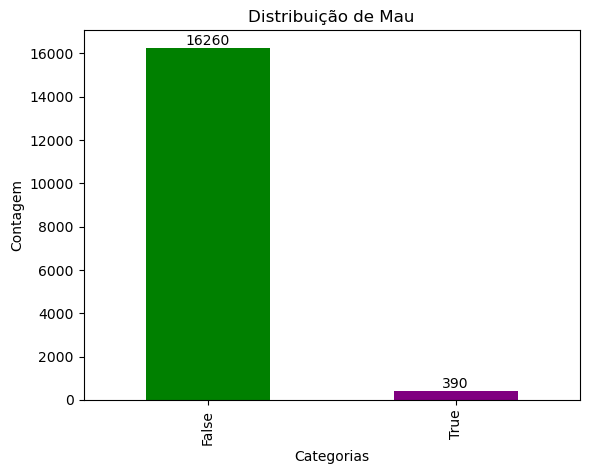

In [5]:
# Atribuindo o nome da coluna à variável
var = 'mau'

# Criando a contagem de valores
contagem_valores = df[var].value_counts()

# Criando um gráfico de barras
grafico_barras = contagem_valores.plot(kind='bar', color=['green', 'purple'])

# Adicionando rótulos e título ao gráfico
grafico_barras.set_ylabel('Contagem')
grafico_barras.set_xlabel('Categorias')
grafico_barras.set_title(f'Distribuição de {var.capitalize()}')

# Adicionando rótulos nas barras
for index, value in enumerate(contagem_valores):
    grafico_barras.text(index, value, str(value), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

### <span style="color:blue">Tarefa 01 - gráfico de barras</span>
<span style="color:blue"> Com base no código da célula anterior, construa um gráfico de barras para pelo menos duas outras variáveis. 
**Dica:** Não tente usar as variáveis ```tempo_emprego``` e ```idade``` pois o gráfico de barras dessa forma como construímos não é adequado para elas. </span>

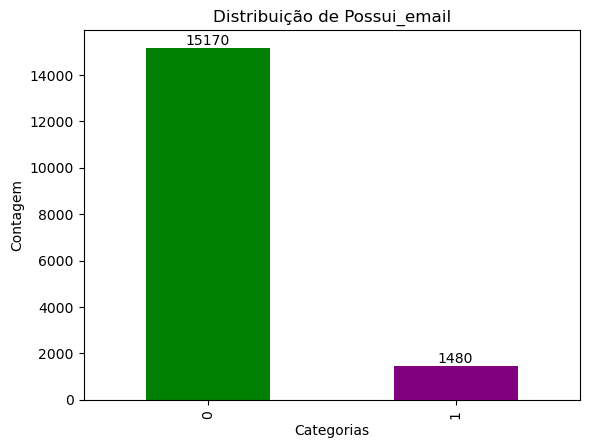

In [6]:
# Atribuindo o nome da coluna à variável
var = 'possui_email'

# Criando a contagem de valores
contagem_valores = df[var].value_counts()

# Criando um gráfico de barras
grafico_barras = contagem_valores.plot(kind='bar', color=['green', 'purple'])

# Adicionando rótulos e título ao gráfico
grafico_barras.set_ylabel('Contagem')
grafico_barras.set_xlabel('Categorias')
grafico_barras.set_title(f'Distribuição de {var.capitalize()}')

# Adicionando rótulos nas barras
for index, value in enumerate(contagem_valores):
    grafico_barras.text(index, value, str(value), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

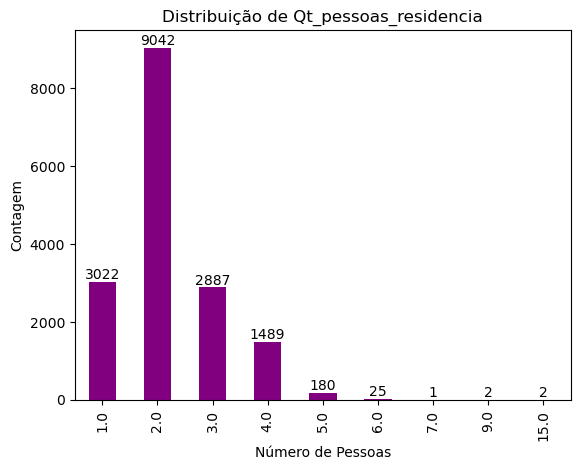

In [7]:
# Atribuindo o nome da coluna à variável
var = 'qt_pessoas_residencia'

# Criando a contagem de valores
contagem_valores = df[var].value_counts()

# Ordenando os índices para melhor visualização
contagem_valores = contagem_valores.sort_index()

# Criando um gráfico de barras
grafico_barras = contagem_valores.plot(kind='bar', color='purple')

# Adicionando rótulos e título ao gráfico
grafico_barras.set_ylabel('Contagem')
grafico_barras.set_xlabel('Número de Pessoas')
grafico_barras.set_title(f'Distribuição de {var.capitalize()}')

# Adicionando rótulos nas barras
for index, value in enumerate(contagem_valores):
    grafico_barras.text(index, value, str(value), ha='center', va='bottom')

# Exibindo o gráfico
plt.show()

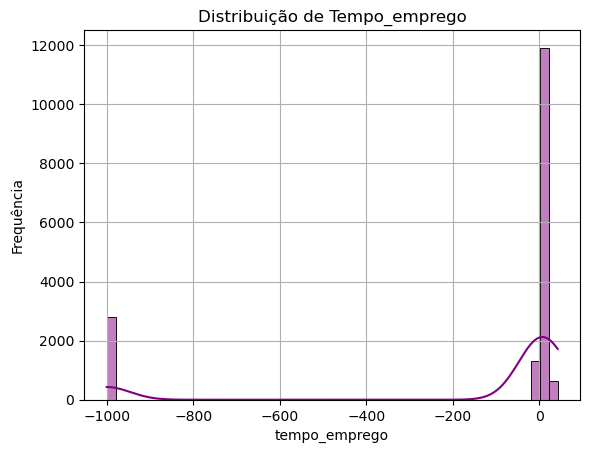

In [8]:
# Atribuindo o nome da coluna à variável
var = "tempo_emprego"

# Criando e exibindo um histograma para a variável 'tempo_emprego'
sns.histplot(df[var], bins=50, kde=True, color='purple')
plt.title(f'Distribuição de {var.capitalize()}')
plt.xlabel(var)
plt.ylabel('Frequência')
plt.grid(True)

# Exibindo o histograma
plt.show()

In [9]:
# Alterando valores de -1000 para -2 na coluna 'tempo_emprego' para melhor visualização no gráfico
var = "tempo_emprego"
df.loc[df[var] < 0, var] = -2

### <span style="color:blue">Tarefa 02 - Histograma </span>
<span style="color:blue"> Com base no código da célula anterior, construa o histograma da variavel ```dade```.  </span>


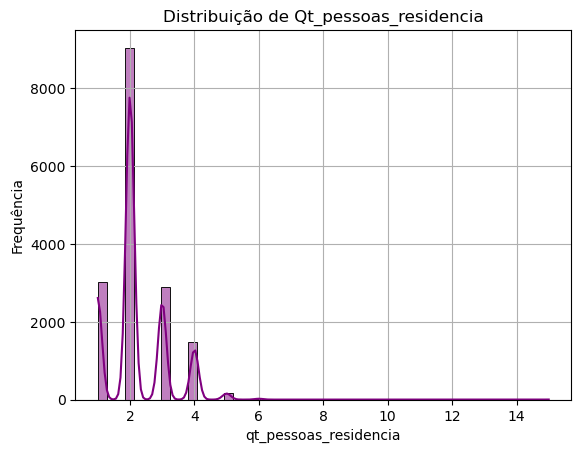

In [10]:
# Limpando a figura atual
plt.clf()

# Atribuindo o nome da coluna à variável
var = "qt_pessoas_residencia"

# Criando e exibindo um histograma para a variável 'qt_pessoas_residencia' usando seaborn
sns.histplot(df[var], bins=50, kde=True, color='purple')
plt.title(f'Distribuição de {var.capitalize()}')
plt.xlabel(var)
plt.ylabel('Frequência')
plt.grid(True)

# Exibindo o histograma
plt.show()

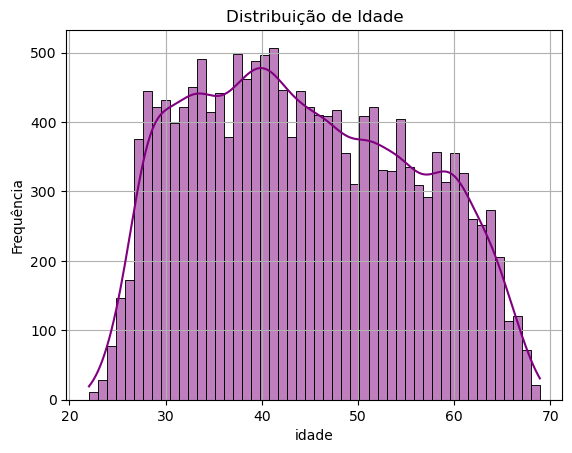

In [11]:
# Limpando a figura atual
plt.clf()

# Atribuindo o nome da coluna à variável
var = "idade"

# Criando e exibindo um histograma para a variável 'idade' usando seaborn
sns.histplot(df[var], bins=50, kde=True, color='purple')
plt.title(f'Distribuição de {var.capitalize()}')
plt.xlabel(var)
plt.ylabel('Frequência')
plt.grid(True)

# Exibindo o histograma
plt.show()

### Entendimento dos dados - Bivariadas

Entender a alteração da inadimplência indicada pela variável resposta (```AtrasoRelevante2anos```) e as variáveis explicativas (demais). Para isto, vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.


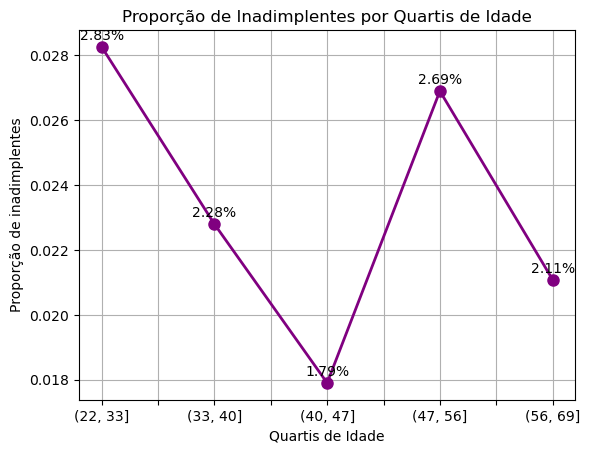

In [12]:
# Criando categorias e bins usando quartis para a variável 'idade'
var = 'idade'
bins = np.round(pd.qcut(df[var], 5, retbins=True)[1]).astype(int)
df[var] = pd.to_numeric(df[var], errors='coerce')
bins = list(map(int, bins))

# Agrupando pelos quartis e calculando a média de inadimplentes
biv = df.groupby(pd.cut(df[var], bins).astype(str))['mau'].mean()

# Criando um gráfico de linha para a proporção de inadimplentes em relação à idade
ax = biv.plot.line(marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
ax.set(ylabel="Proporção de inadimplentes", xlabel="Quartis de Idade", title="Proporção de Inadimplentes por Quartis de Idade")

# Adicionando rótulos nas linhas
for i, txt in enumerate(biv):
    ax.annotate(f'{txt:.2%}', (i, txt), textcoords="offset points", xytext=(0,5), ha='center')

# Exibindo o gráfico
plt.grid(True)
plt.show()

### <span style="color:blue">Tarefa 03 - Bivariada </span>
<span style="color:blue"> Com base no código da célula anterior, construa uma análise bivariada para a variável  ```tempo_emprego```.  Em seguida, insira uma célula de markdown e conclua se a variável parece discriminar risco de crédito. </span>

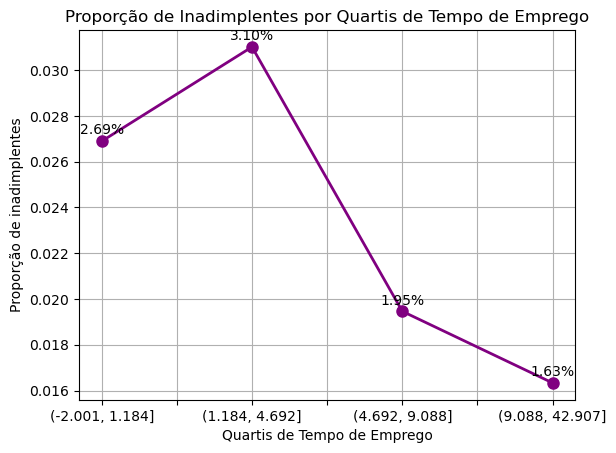

In [13]:
# Criando categorias e bins usando quartis para a variável 'tempo_emprego'
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 4, retbins=True)

# Agrupando pelos quartis e calculando a média de inadimplentes
g = df.groupby(cat_srs)
biv = g['mau'].mean()

# Criando um gráfico de linha para a proporção de inadimplentes em relação ao tempo de emprego
ax = biv.plot.line(marker='o', color='purple', linestyle='-', linewidth=2, markersize=8)
ax.set(ylabel="Proporção de inadimplentes", xlabel="Quartis de Tempo de Emprego", title="Proporção de Inadimplentes por Quartis de Tempo de Emprego")

# Adicionando rótulos nas linhas
for i, txt in enumerate(biv):
    ax.annotate(f'{txt:.2%}', (i, txt), textcoords="offset points", xytext=(0,5), ha='center')

# Exibindo o gráfico
plt.grid(True)
plt.show()

- A maior prorporção de inadimplentes se encontra entre 1.184 e 4.692 tempo de emprego

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção
Neste caso, os dados já estão pré-selecionados
- limpeza
Precisaremos identificar e tratar dados faltantes
- construção
Neste primeiro exercício não faremos construção de novas variáveis
- integração
Temos apenas uma fonte de dados, não é necessário agregação
- formatação
Os dados já se encontram em formatos úteis

Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

In [14]:
# Criando um DataFrame com os tipos de dados das variáveis
metadata = pd.DataFrame(df.dtypes, columns=['Tipo'])

# Inicializando a coluna 'n_categorias'
metadata['Nº de Categorias'] = 0

# Contando o número de categorias para cada variável
for var in metadata.index:
    metadata.loc[var, 'Nº de Categorias'] = len(df[var].unique())

# Exibindo o DataFrame com informações sobre tipos de dados e número de categorias
pt_metadata = PrettyTable()
pt_metadata.field_names = ['Variável', 'Tipo', 'Nº de Categorias']

for row in metadata.itertuples():
    pt_metadata.add_row([row.Index, row.Tipo, row._2])

print("Metadados do DataFrame:")
print(pt_metadata)

Metadados do DataFrame:
+-----------------------+---------+------------------+
|        Variável       |   Tipo  | Nº de Categorias |
+-----------------------+---------+------------------+
|          sexo         |  object |        2         |
|    posse_de_veiculo   |  object |        2         |
|    posse_de_imovel    |  object |        2         |
|       qtd_filhos      |  int64  |        8         |
|       tipo_renda      |  object |        5         |
|        educacao       |  object |        5         |
|      estado_civil     |  object |        5         |
|    tipo_residencia    |  object |        6         |
|         idade         | float64 |       5298       |
|     tempo_emprego     | float64 |       3005       |
|     possui_celular    |  int64  |        1         |
| possui_fone_comercial |  int64  |        2         |
|      possui_fone      |  int64  |        2         |
|      possui_email     |  int64  |        2         |
| qt_pessoas_residencia | float64 |      

In [15]:
def convert_dummy(df, feature, rank=0):
    # Criando variáveis dummy para a coluna 'feature'
    pos = pd.get_dummies(df[feature], prefix=feature)
    
    # Obtendo o modo da coluna 'feature'
    mode = df[feature].value_counts().index[rank]
    
    # Removendo a dummy correspondente à moda para evitar multicolinearidade
    biggest = feature + '_' + str(mode)
    pos.drop([biggest], axis=1, inplace=True)
    
    # Removendo a coluna original e adicionando as variáveis dummy ao DataFrame
    df.drop([feature], axis=1, inplace=True)
    df = df.join(pos)
    
    return df

In [16]:
# Convertendo variáveis categóricas para dummy para aquelas do tipo 'object'
for var in metadata[metadata['Tipo'] == 'object'].index:
    df = convert_dummy(df, var)

In [17]:
# Exibindo as primeiras linhas do conjunto de dados
df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,False,False,False,False,False,False,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,False,False,False,False,False,False,False,False,False


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
#### Dividindo a base em treino e teste

In [18]:
# Separando a variável de resposta da base de treinamento
x = df.drop("mau", axis=1)
y = df["mau"]

# Dividindo as bases de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [19]:
# Exibindo a base de treinamento para as variáveis independentes
x_train.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,sexo_M,posse_de_veiculo_Y,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
7696,0,30.380822,4.019178,1,0,0,0,2.0,True,True,...,False,False,False,False,False,False,False,False,False,True
8704,0,64.161644,-2.000000,1,0,0,0,1.0,False,False,...,False,False,True,False,False,False,False,False,False,False
16256,0,61.852055,-2.000000,1,0,0,0,1.0,False,False,...,False,False,False,True,False,False,False,False,False,False
9269,1,34.810959,7.600000,1,0,1,0,3.0,True,True,...,False,True,False,False,False,False,False,False,False,False
5511,0,41.797260,9.016438,1,0,0,0,1.0,False,False,...,False,False,True,False,False,False,False,False,False,False


### Rodando o modelo
A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

### <span style="color:blue">Tarefa 04 - Bivariada </span>
<span style="color:blue"> Para essa tarefa, crie três células extras, copie nelas o código das três células anteriores (na mesma ordem) e altere o parâmetro ```n_estimators=``` da função ```RandomForestClassifier``` e insira uma quantidade maior que 3 nesse parâmetro. Rode as três células anteriores para calcular a acurácia do modelo e veja se você consegue uma acurácia melhor. </span>

In [20]:
# Célula 1 - Treinando um modelo Random Forest com 10 árvores
clf_1 = RandomForestClassifier(n_estimators=10)
clf_1.fit(x_train, y_train)

# Célula 2 - Avaliando o Modelo
y_pred_1 = clf_1.predict(x_test)
acc_1 = metrics.accuracy_score(y_test, y_pred_1)
print('Acurácia com 10 árvores: {0:.2f}%'.format(acc_1 * 100))

# Célula 3 - Calculando e exibindo métricas de desempenho
confusion_matrix_1 = pd.crosstab(index=y_pred_1, columns=y_test)

# Sensibilidade e Especificidade
sensibilidade_1 = confusion_matrix_1.iloc[1, 1] / (confusion_matrix_1.iloc[1, 1] + confusion_matrix_1.iloc[0, 1])
especificidade_1 = confusion_matrix_1.iloc[0, 0] / (confusion_matrix_1.iloc[0, 0] + confusion_matrix_1.iloc[1, 0])

# Criando uma tabela visualmente atraente para as métricas de desempenho
pt_metrics_1 = PrettyTable()
pt_metrics_1.field_names = ["Métrica", "Valor"]
pt_metrics_1.add_row(["Acurácia", f"{acc_1:.2%}"])
pt_metrics_1.add_row(["Sensibilidade", f"{sensibilidade_1:.2f}"])
pt_metrics_1.add_row(["Especificidade", f"{especificidade_1:.2f}"])

# Exibindo a tabela de métricas de desempenho
print('\nMétricas de Desempenho:')
print(pt_metrics_1)

# Célula 4 - Exibindo a matriz de confusão de forma organizada
print('\nMatriz de Confusão:')
pt_confusion_matrix_1 = PrettyTable()
pt_confusion_matrix_1.field_names = ["", "Real Bom", "Real Mau"]
pt_confusion_matrix_1.add_row(["Previsto Bom", confusion_matrix_1.iloc[0, 0], confusion_matrix_1.iloc[0, 1]])
pt_confusion_matrix_1.add_row(["Previsto Mau", confusion_matrix_1.iloc[1, 0], confusion_matrix_1.iloc[1, 1]])

print(pt_confusion_matrix_1)

Acurácia com 10 árvores: 97.77%

Métricas de Desempenho:
+----------------+--------+
|    Métrica     | Valor  |
+----------------+--------+
|    Acurácia    | 97.77% |
| Sensibilidade  |  0.16  |
| Especificidade |  0.99  |
+----------------+--------+

Matriz de Confusão:
+--------------+----------+----------+
|              | Real Bom | Real Mau |
+--------------+----------+----------+
| Previsto Bom |   4057   |    67    |
| Previsto Mau |    26    |    13    |
+--------------+----------+----------+


In [21]:
# Célula 2 - Treinando um modelo Random Forest com 50 árvores
clf_2 = RandomForestClassifier(n_estimators=50)
clf_2.fit(x_train, y_train)

# Célula 3 - Avaliando o Modelo
# Calculando a acurácia do modelo
y_pred_2 = clf_2.predict(x_test)
acc_2 = metrics.accuracy_score(y_test, y_pred_2)
print('Acurácia com 50 árvores: {0:.2f}%'.format(acc_2 * 100))

# Célula 4 - Calculando e exibindo métricas de desempenho
confusion_matrix_2 = pd.crosstab(index=y_pred_2, columns=y_test)

# Sensibilidade e Especificidade
sensibilidade_2 = confusion_matrix_2.iloc[1, 1] / (confusion_matrix_2.iloc[1, 1] + confusion_matrix_2.iloc[0, 1])
especificidade_2 = confusion_matrix_2.iloc[0, 0] / (confusion_matrix_2.iloc[0, 0] + confusion_matrix_2.iloc[1, 0])

# Criando uma tabela visualmente atraente para as métricas de desempenho
pt_metrics_2 = PrettyTable()
pt_metrics_2.field_names = ["Métrica", "Valor"]
pt_metrics_2.add_row(["Acurácia", f"{acc_2:.2%}"])
pt_metrics_2.add_row(["Sensibilidade", f"{sensibilidade_2:.2f}"])
pt_metrics_2.add_row(["Especificidade", f"{especificidade_2:.2f}"])

# Exibindo a tabela de métricas de desempenho
print('\nMétricas de Desempenho:')
print(pt_metrics_2)

# Célula 5 - Exibindo a matriz de confusão de forma organizada
print('\nMatriz de Confusão com 50 árvores:')
pt_confusion_matrix_2 = PrettyTable()
pt_confusion_matrix_2.field_names = ["", "Real Bom", "Real Mau"]
pt_confusion_matrix_2.add_row(["Previsto Bom", confusion_matrix_2.iloc[0, 0], confusion_matrix_2.iloc[0, 1]])
pt_confusion_matrix_2.add_row(["Previsto Mau", confusion_matrix_2.iloc[1, 0], confusion_matrix_2.iloc[1, 1]])

print(pt_confusion_matrix_2)

Acurácia com 50 árvores: 97.79%

Métricas de Desempenho:
+----------------+--------+
|    Métrica     | Valor  |
+----------------+--------+
|    Acurácia    | 97.79% |
| Sensibilidade  |  0.16  |
| Especificidade |  0.99  |
+----------------+--------+

Matriz de Confusão com 50 árvores:
+--------------+----------+----------+
|              | Real Bom | Real Mau |
+--------------+----------+----------+
| Previsto Bom |   4058   |    67    |
| Previsto Mau |    25    |    13    |
+--------------+----------+----------+


In [22]:
# Célula 6 - Treinando um modelo Random Forest com 100 árvores
clf_3 = RandomForestClassifier(n_estimators=100)
clf_3.fit(x_train, y_train)

# Célula 7 - Avaliando o Modelo
# Calculando a acurácia do modelo
y_pred_3 = clf_3.predict(x_test)
acc_3 = metrics.accuracy_score(y_test, y_pred_3)
print('Acurácia com 100 árvores: {0:.2f}%'.format(acc_3 * 100))

# Célula 8 - Calculando e exibindo métricas de desempenho
confusion_matrix_3 = pd.crosstab(index=y_pred_3, columns=y_test)

# Sensibilidade e Especificidade
sensibilidade_3 = confusion_matrix_3.iloc[1, 1] / (confusion_matrix_3.iloc[1, 1] + confusion_matrix_3.iloc[0, 1])
especificidade_3 = confusion_matrix_3.iloc[0, 0] / (confusion_matrix_3.iloc[0, 0] + confusion_matrix_3.iloc[1, 0])

# Criando uma tabela visualmente atraente para as métricas de desempenho
pt_metrics_3 = PrettyTable()
pt_metrics_3.field_names = ["Métrica", "Valor"]
pt_metrics_3.add_row(["Acurácia", f"{acc_3:.2%}"])
pt_metrics_3.add_row(["Sensibilidade", f"{sensibilidade_3:.2f}"])
pt_metrics_3.add_row(["Especificidade", f"{especificidade_3:.2f}"])

# Exibindo a tabela de métricas de desempenho
print('\nMétricas de Desempenho:')
print(pt_metrics_3)

# Célula 9 - Exibindo a matriz de confusão de forma organizada
print('\nMatriz de Confusão com 100 árvores:')
pt_confusion_matrix_3 = PrettyTable()
pt_confusion_matrix_3.field_names = ["", "Real Bom", "Real Mau"]
pt_confusion_matrix_3.add_row(["Previsto Bom", confusion_matrix_3.iloc[0, 0], confusion_matrix_3.iloc[0, 1]])
pt_confusion_matrix_3.add_row(["Previsto Mau", confusion_matrix_3.iloc[1, 0], confusion_matrix_3.iloc[1, 1]])

print(pt_confusion_matrix_3)

Acurácia com 100 árvores: 97.86%

Métricas de Desempenho:
+----------------+--------+
|    Métrica     | Valor  |
+----------------+--------+
|    Acurácia    | 97.86% |
| Sensibilidade  |  0.15  |
| Especificidade |  0.99  |
+----------------+--------+

Matriz de Confusão com 100 árvores:
+--------------+----------+----------+
|              | Real Bom | Real Mau |
+--------------+----------+----------+
| Previsto Bom |   4062   |    68    |
| Previsto Mau |    21    |    12    |
+--------------+----------+----------+


## Etapa 5 Crisp-DM: Avaliação dos resultados
A etapa final do CRISP. Neste casp, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4062 x 5          | 68 x (-100)    | 13.510 |
| Reprovar  |  21 x 5           | 12 x (-100)    | -1.095 |

Estariamos evitando, portanto, um prejuízo de -1.095 '*dinheiros*' - o que na prática significa um aumento no lucro.


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.